## Imports

In [1]:
from environment import Environment
from agent import Agent

2025-06-21 02:55:12.752269: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-21 02:55:12.762142: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750454712.773088 1721268 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750454712.776391 1721268 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1750454712.785008 1721268 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [2]:
from tensorflow.keras.regularizers import l2

## Environment

### Environment Initialization

In [3]:
env=Environment(
    symbol="AAPL",
    short_rate=0.05,
    maturity=4.0,
    steps=1000,
    number_lags=5,
    window=10
)

### Environment Data Inspection

#### First 5 entries of dataset

In [4]:
env.final_data.head()

,Xt,Xt_returns,Yt,time_to_mature,Ct,Ct_returns,delta,Xt_lag_1,Yt_lag_1,Ct_lag_1,...,Xt_vol_lag_3,Ct_vol_lag_3,Xt_distance_lag_4,Ct_distance_lag_4,Xt_vol_lag_4,Ct_vol_lag_4,Xt_distance_lag_5,Ct_distance_lag_5,Xt_vol_lag_5,Ct_vol_lag_5
0,146.15,0.025642,135.184947,3.940,49.655863,0.058848,0.780480,142.45,135.157913,46.818038,...,0.011452,0.026466,6.308,4.784395,0.010676,0.024682,4.080,3.013869,0.009408,0.021938
1,145.40,-0.005145,135.211987,3.936,49.046242,-0.012353,0.777712,146.15,135.184947,49.655863,...,0.013394,0.030900,4.486,3.369550,0.011452,0.026466,6.308,4.784395,0.010676,0.024682
2,146.80,0.009583,135.239032,3.932,50.113170,0.021520,0.782645,145.40,135.211987,49.046242,...,0.016210,0.037354,1.484,1.030427,0.013394,0.030900,4.486,3.369550,0.011452,0.026466
3,148.56,0.011918,135.266082,3.928,51.470532,0.026726,0.788714,146.80,135.239032,50.113170,...,0.017505,0.040338,-2.705,-2.210502,0.016210,0.037354,1.484,1.030427,0.013394,0.030900
4,148.99,0.002890,135.293138,3.924,51.784437,0.006080,0.790121,148.56,135.266082,51.470532,...,0.016821,0.038740,0.582,0.333037,0.017505,0.040338,-2.705,-2.210502,0.016210,0.037354


#### Last 5 entries of Dataset

In [5]:
env.final_data.tail()

,Xt,Xt_returns,Yt,time_to_mature,Ct,Ct_returns,delta,Xt_lag_1,Yt_lag_1,Ct_lag_1,...,Xt_vol_lag_3,Ct_vol_lag_3,Xt_distance_lag_4,Ct_distance_lag_4,Xt_vol_lag_4,Ct_vol_lag_4,Xt_distance_lag_5,Ct_distance_lag_5,Xt_vol_lag_5,Ct_vol_lag_5
980,196.45,-0.013901,164.456125,0.020,61.804713,-0.043951,1.0,199.20,164.423237,64.581639,...,0.008577,0.025618,-0.072,-0.193007,0.011390,0.034715,3.016,2.895017,0.015068,0.046402
981,198.42,0.009978,164.489020,0.016,63.747781,0.030955,1.0,196.45,164.456125,61.804713,...,0.010774,0.032366,0.902,0.780969,0.008577,0.025618,-0.072,-0.193007,0.011390,0.034715
982,195.64,-0.014110,164.521921,0.012,60.940844,-0.045031,1.0,198.42,164.489020,63.747781,...,0.010796,0.032438,-2.824,-2.945056,0.010774,0.032366,0.902,0.780969,0.008577,0.025618
983,196.58,0.004793,164.554829,0.008,61.853901,0.014872,1.0,195.64,164.521921,60.940844,...,0.011424,0.034514,-2.329,-2.450080,0.010796,0.032438,-2.824,-2.945056,0.010774,0.032366
984,201.00,0.022235,164.587743,0.004,66.246953,0.068614,1.0,196.58,164.554829,61.853901,...,0.011918,0.036155,-4.639,-4.760104,0.011424,0.034514,-2.329,-2.450080,0.010796,0.032438


#### Dataset Info

In [6]:
env.final_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 985 entries, 0 to 984
Data columns (total 56 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Xt                 985 non-null    float64
 1   Xt_returns         985 non-null    float64
 2   Yt                 985 non-null    float64
 3   time_to_mature     985 non-null    float64
 4   Ct                 985 non-null    float64
 5   Ct_returns         985 non-null    float64
 6   delta              985 non-null    float64
 7   Xt_lag_1           985 non-null    float64
 8   Yt_lag_1           985 non-null    float64
 9   Ct_lag_1           985 non-null    float64
 10  Xt_lag_2           985 non-null    float64
 11  Yt_lag_2           985 non-null    float64
 12  Ct_lag_2           985 non-null    float64
 13  Xt_lag_3           985 non-null    float64
 14  Yt_lag_3           985 non-null    float64
 15  Ct_lag_3           985 non-null    float64
 16  Xt_lag_4           985 non-null

#### Dataset Statistics

In [7]:
env.final_data.describe()

,Xt,Xt_returns,Yt,time_to_mature,Ct,Ct_returns,delta,Xt_lag_1,Yt_lag_1,Ct_lag_1,...,Xt_vol_lag_3,Ct_vol_lag_3,Xt_distance_lag_4,Ct_distance_lag_4,Xt_vol_lag_4,Ct_vol_lag_4,Xt_distance_lag_5,Ct_distance_lag_5,Xt_vol_lag_5,Ct_vol_lag_5
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,...,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,179.934142,0.000350,149.404940,1.972000,64.156241,0.000352,0.871153,179.874701,149.375062,64.136516,...,0.016265,0.041947,0.257724,0.080276,0.016264,0.041935,0.266576,0.088169,0.016262,0.041922
std,30.790817,0.018038,8.498074,1.137957,20.919201,0.048529,0.091926,30.806619,8.496375,20.926386,...,0.008081,0.025240,5.303756,4.819046,0.008081,0.025246,5.302851,4.817476,0.008083,0.025253
min,125.020000,-0.097013,135.184947,0.004000,24.707768,-0.259761,0.629788,125.020000,135.157913,24.707768,...,0.004919,0.012023,-35.374000,-35.349745,0.004919,0.012023,-35.374000,-35.349745,0.004919,0.012023
25%,153.340000,-0.008457,142.002380,0.988000,49.004024,-0.021820,0.791901,153.200000,141.973983,48.998866,...,0.011162,0.027597,-2.952000,-2.624126,0.011131,0.027575,-2.952000,-2.619088,0.011110,0.027571
50%,174.330000,0.001123,149.163619,1.972000,60.279395,0.002284,0.863358,174.310000,149.133790,60.223355,...,0.014738,0.036701,0.562000,0.346501,0.014738,0.036701,0.574000,0.347029,0.014738,0.036701
75%,197.570000,0.009841,156.686003,2.956000,72.671730,0.024475,0.973331,197.490000,156.654669,72.671730,...,0.019297,0.049263,3.942000,3.195727,0.019297,0.049263,3.948000,3.195727,0.019297,0.049263
max,259.020000,0.142617,164.587743,3.940000,127.439097,0.512632,1.000000,259.020000,164.554829,127.439097,...,0.069116,0.232329,15.820000,15.014445,0.069116,0.232329,15.820000,15.014445,0.069116,0.232329


#### Correlation in Dataset

In [8]:
env.final_data.corr()

,Xt,Xt_returns,Yt,time_to_mature,Ct,Ct_returns,delta,Xt_lag_1,Yt_lag_1,Ct_lag_1,...,Xt_vol_lag_3,Ct_vol_lag_3,Xt_distance_lag_4,Ct_distance_lag_4,Xt_vol_lag_4,Ct_vol_lag_4,Xt_distance_lag_5,Ct_distance_lag_5,Xt_vol_lag_5,Ct_vol_lag_5
Xt,1.000000,0.045152,0.818580,-0.813374,0.964817,0.047269,0.955850,0.994588,0.818580,0.957905,...,-0.188702,-0.180946,0.105095,0.104669,-0.184178,-0.175570,0.101986,0.101156,-0.180884,-0.171226
Xt_returns,0.045152,1.000000,-0.009605,0.009186,0.061671,0.989590,0.034386,-0.057449,-0.009605,-0.071704,...,0.024675,0.038839,-0.044229,-0.050417,0.023555,0.034795,-0.020002,-0.025903,0.009958,0.023745
Yt,0.818580,-0.009605,1.000000,-0.999677,0.644920,-0.006946,0.833996,0.819149,1.000000,0.646055,...,-0.032513,0.053790,-0.024519,-0.025755,-0.030361,0.055369,-0.024074,-0.024976,-0.027829,0.057247
time_to_mature,-0.813374,0.009186,-0.999677,1.000000,-0.637733,0.006543,-0.827534,-0.813891,-0.999677,-0.638794,...,0.036421,-0.051029,0.022964,0.024138,0.034255,-0.052624,0.022608,0.023446,0.031703,-0.054519
Ct,0.964817,0.061671,0.644920,-0.637733,1.000000,0.063609,0.882650,0.957534,0.644920,0.990406,...,-0.221944,-0.252580,0.145447,0.147202,-0.215897,-0.245306,0.140323,0.141385,-0.211949,-0.239804
Ct_returns,0.047269,0.989590,-0.006946,0.006543,0.063609,1.000000,0.035901,-0.054044,-0.006946,-0.068501,...,0.030866,0.045203,-0.056920,-0.064244,0.031271,0.041495,-0.021378,-0.027616,0.011336,0.024930
delta,0.955850,0.034386,0.833996,-0.827534,0.882650,0.035901,1.000000,0.952130,0.833996,0.878483,...,-0.151722,-0.124713,0.072812,0.065121,-0.152060,-0.124075,0.074868,0.067040,-0.152395,-0.123382
Xt_lag_1,0.994588,-0.057449,0.819149,-0.813891,0.957534,-0.054044,0.952130,1.000000,0.819149,0.964944,...,-0.191847,-0.185515,0.110134,0.110383,-0.187358,-0.179811,0.104813,0.104598,-0.182586,-0.174249
Yt_lag_1,0.818580,-0.009605,1.000000,-0.999677,0.644920,-0.006946,0.833996,0.819149,1.000000,0.646055,...,-0.032513,0.053790,-0.024519,-0.025755,-0.030361,0.055369,-0.024074,-0.024976,-0.027829,0.057247
Ct_lag_1,0.957905,-0.071704,0.646055,-0.638794,0.990406,-0.068501,0.878483,0.964944,0.646055,1.000000,...,-0.227047,-0.259477,0.153016,0.155733,-0.221210,-0.251841,0.144910,0.146790,-0.215009,-0.244458


### Environment State

In [9]:
state=env.get_state()

#### State First Element: (Timeseries data for Xt, Yt and Ct)

In [10]:
state[0]

[(146.15, 135.18494711696516, 49.65586341354884),
 (142.45, 135.15791283106046, 46.81803784800486),
 (146.39, 135.13088395147233, 49.89393235234897),
 (148.48, 135.10386047711953, 51.560348151467295),
 (149.15, 135.07684240692117, 52.11512814681441),
 (145.64, 135.04982973979656, 49.38454900872652)]

#### State Second Element: (Timeseries data for Xt and Ct returns)

In [11]:
state[1]

[(0.02564243061333787, 0.058847925684569924),
 (-0.027283232239403096, -0.0636308464492719),
 (-0.014175975854570004, -0.032853531185281996),
 (-0.00450224192286715, -0.010702343708040326),
 (0.023814687653525065, 0.053817671944607265),
 (0.007858315754745788, 0.01758036698697786)]

#### State Third Element: (Timeseries data for Xt and Ct distance)

In [12]:
state[2]

[(0.5819999999999936, 0.3330366716942308),
 (-2.7050000000000125, -2.21050151544064),
 (1.4839999999999804, 1.030426760662877),
 (4.48599999999999, 3.3695503368054815),
 (6.307999999999993, 4.784395313757059),
 (4.079999999999984, 3.0138688313471533)]

#### State Fourth Element: (Timeseries data for Xt and Ct Volatility)

In [13]:
state[3]

[(0.01750540654090823, 0.040338382405685116),
 (0.016210358318744865, 0.03735372569956981),
 (0.01339389004814661, 0.030899598877541005),
 (0.011451561737917441, 0.02646600605435119),
 (0.010675700754980779, 0.02468162450637968),
 (0.009407734207061164, 0.021938267896759612)]

#### State Fifth Element: (Curr_Xt, Curr_Yt, Curr_Ct, Strike Price, Short Rate, Time to Maturity, Stock Contrib, Bond Contrib)

In [14]:
state[4]

[146.15, 135.18494711696516, 49.65586341354884, 134.78, 0.05, 3.94, 0, 0]

### Environment Plots

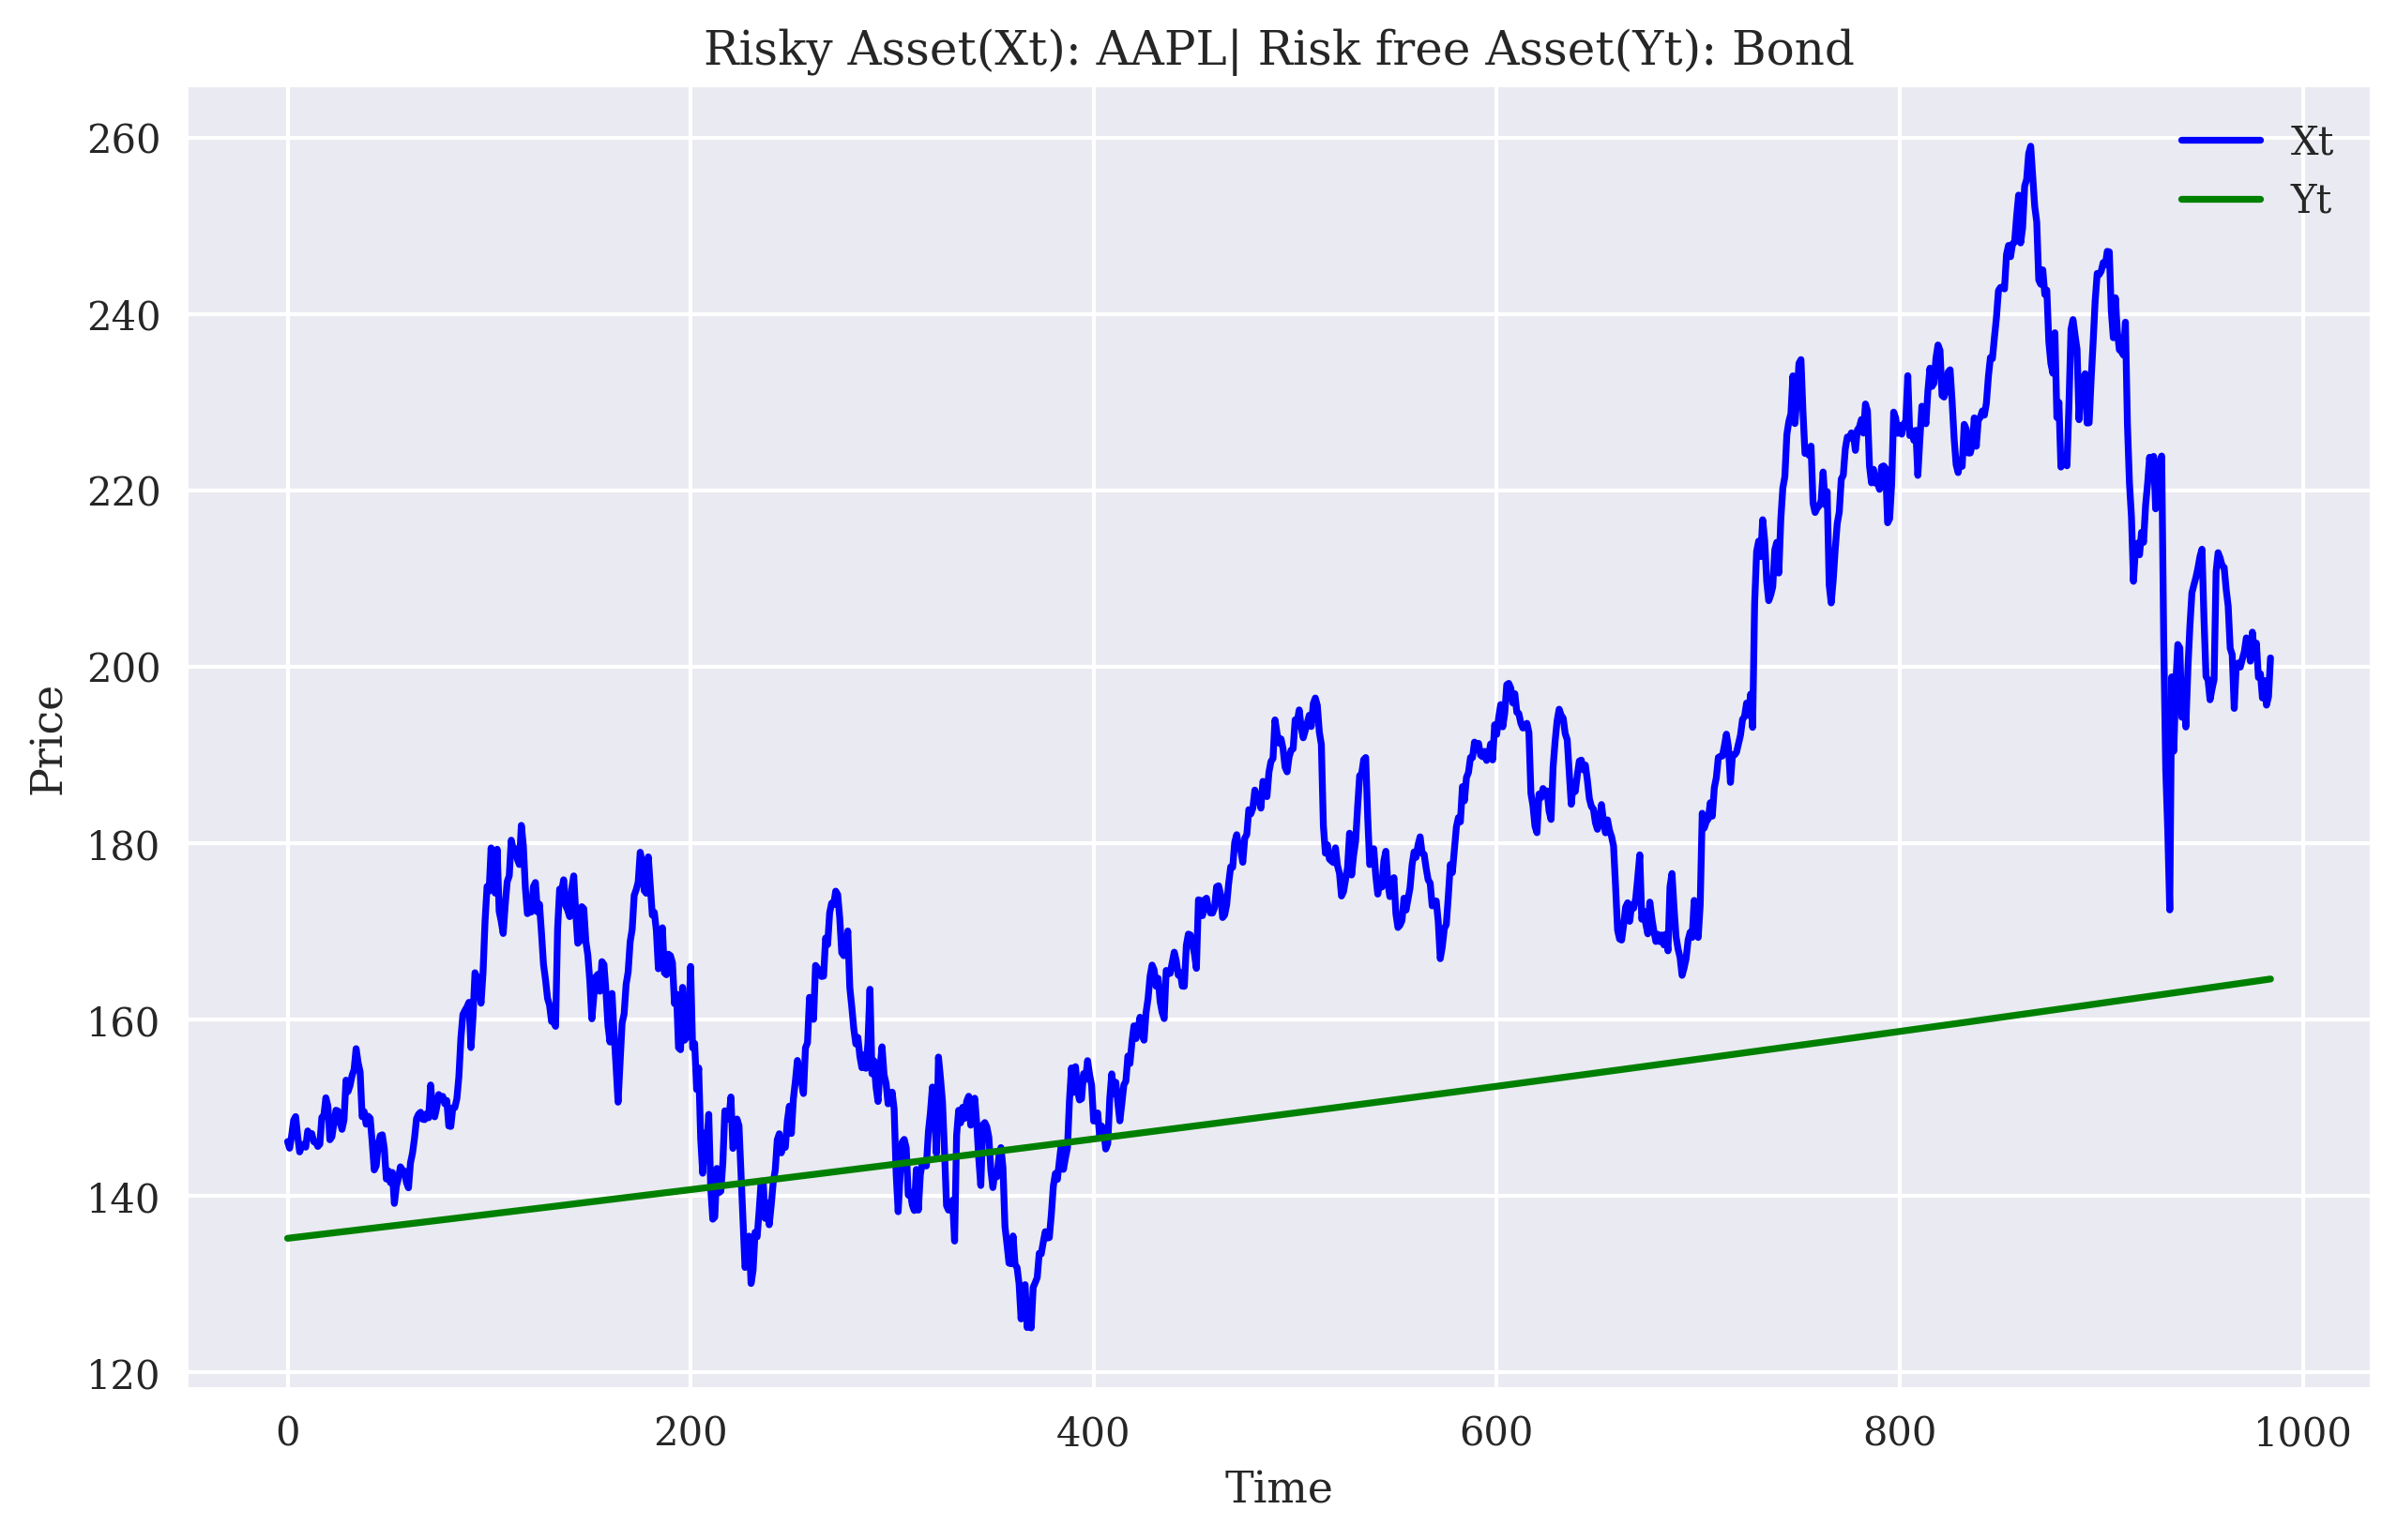

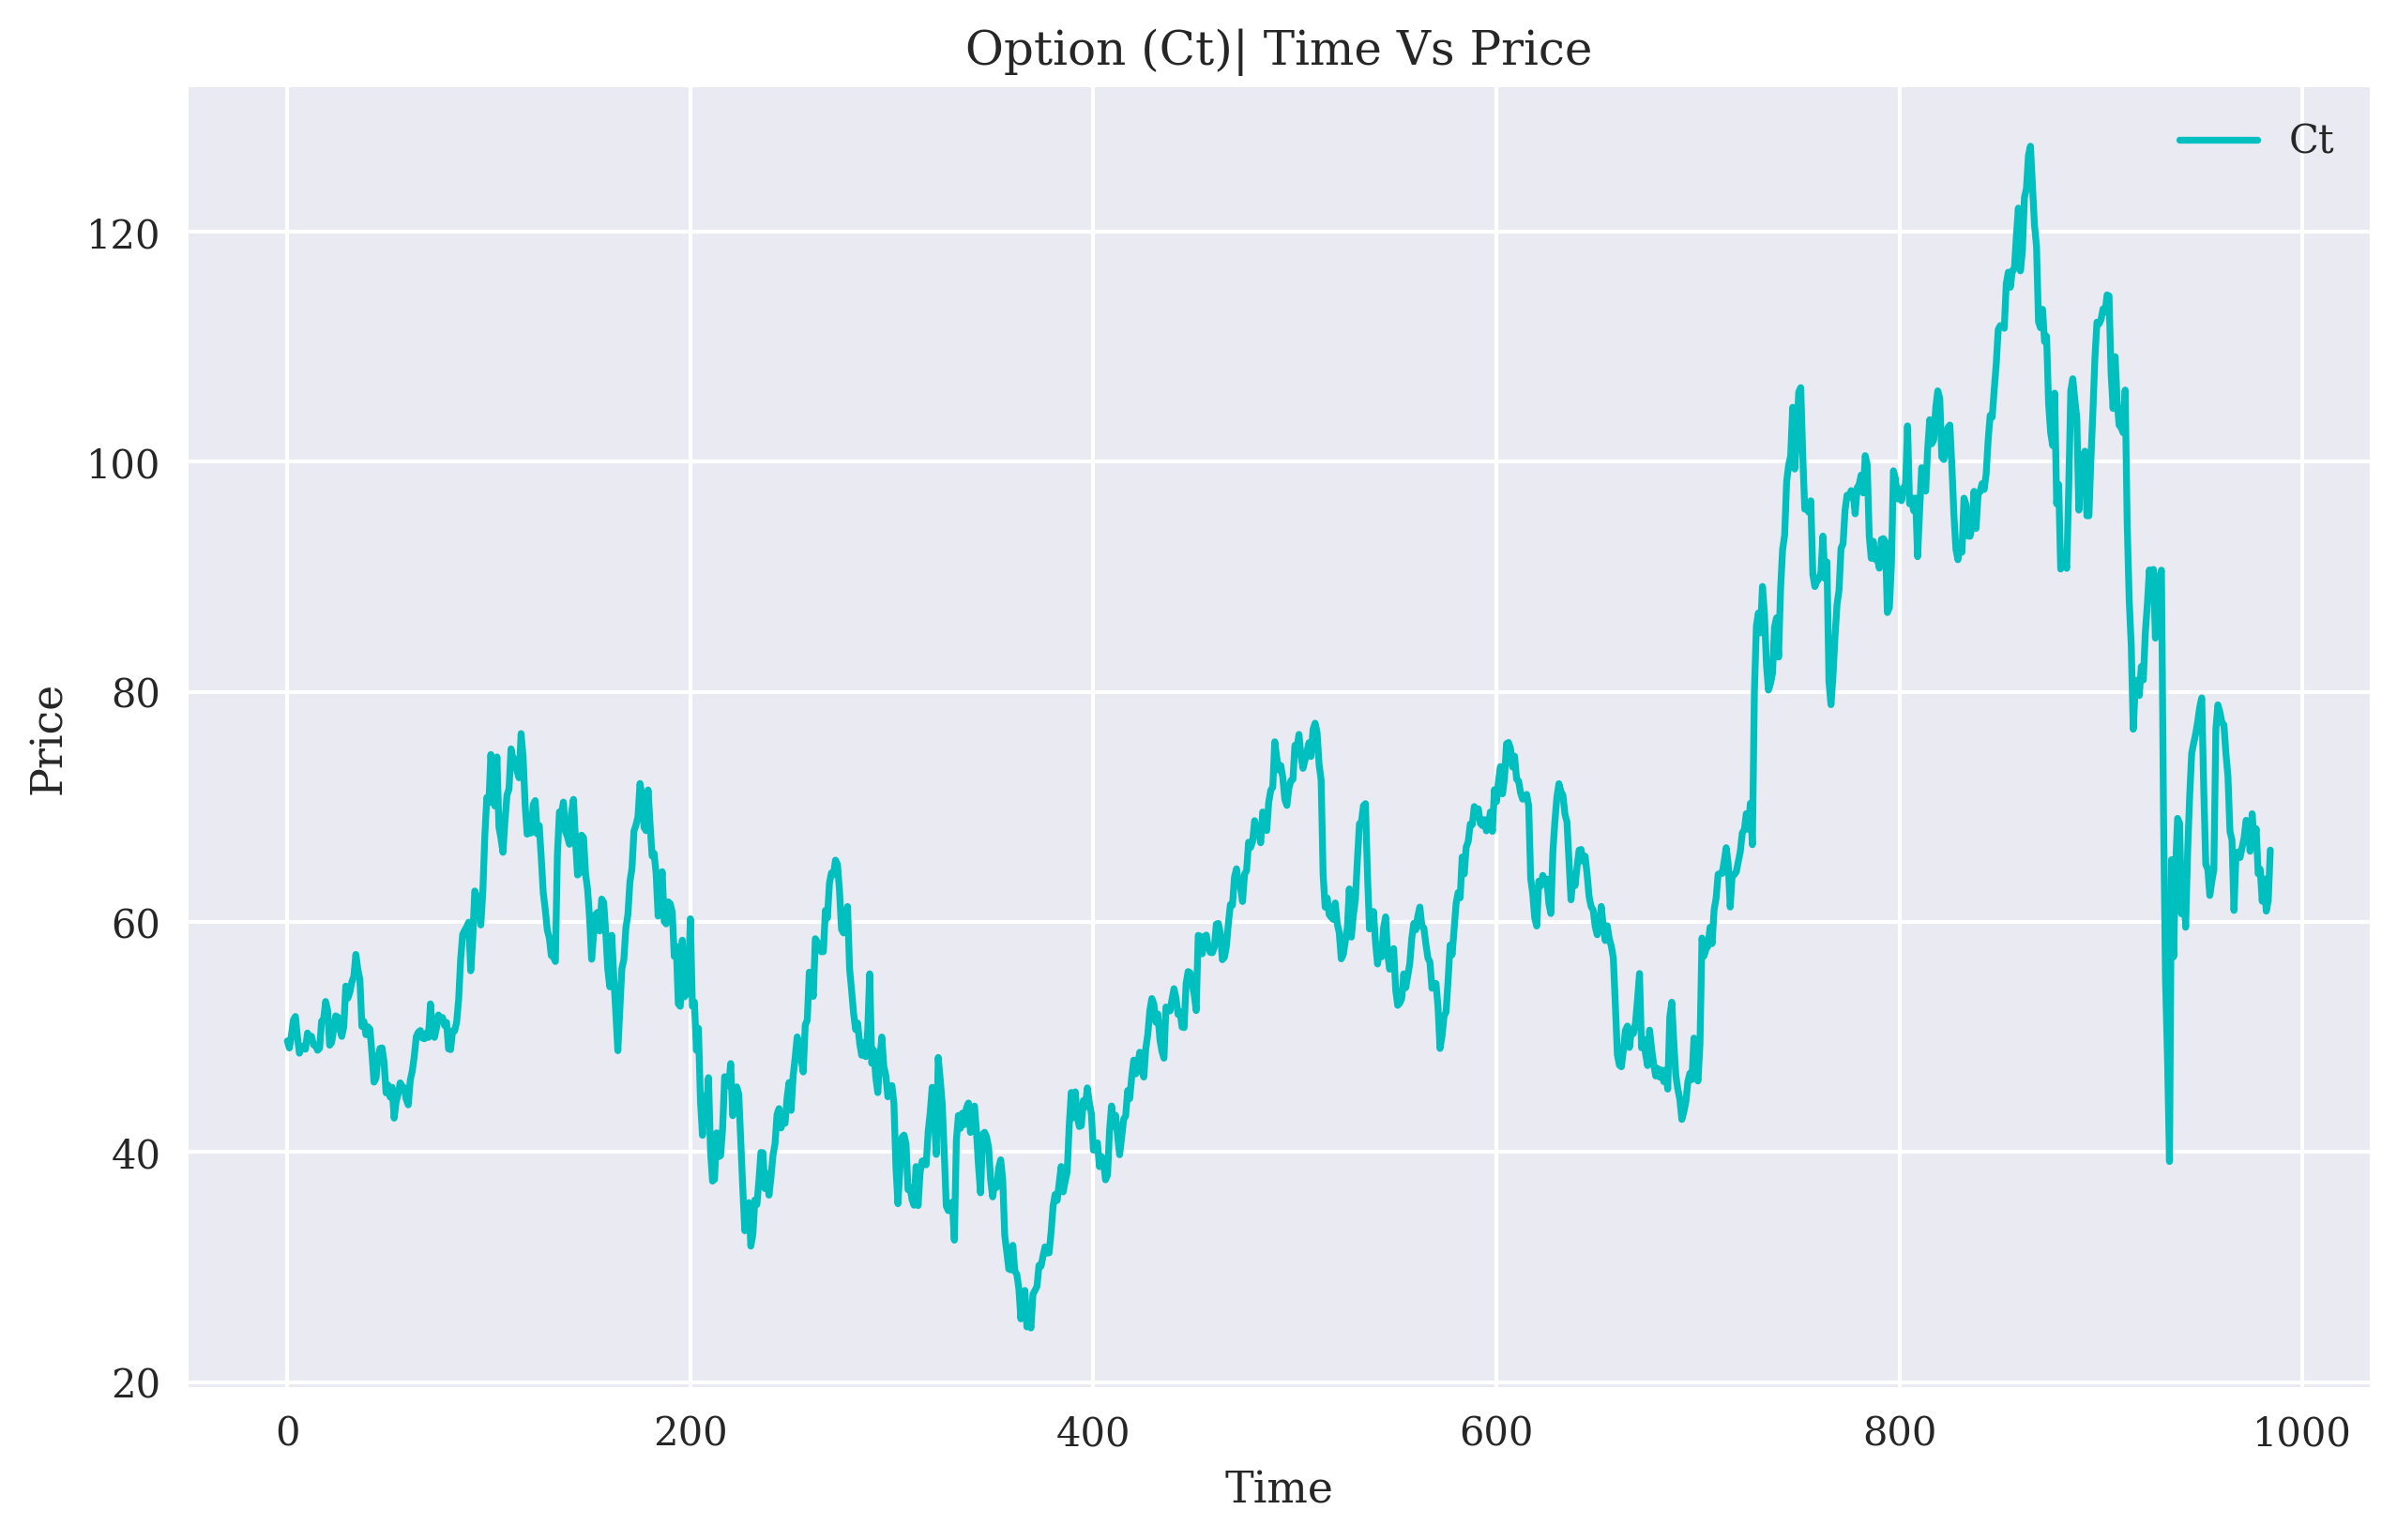

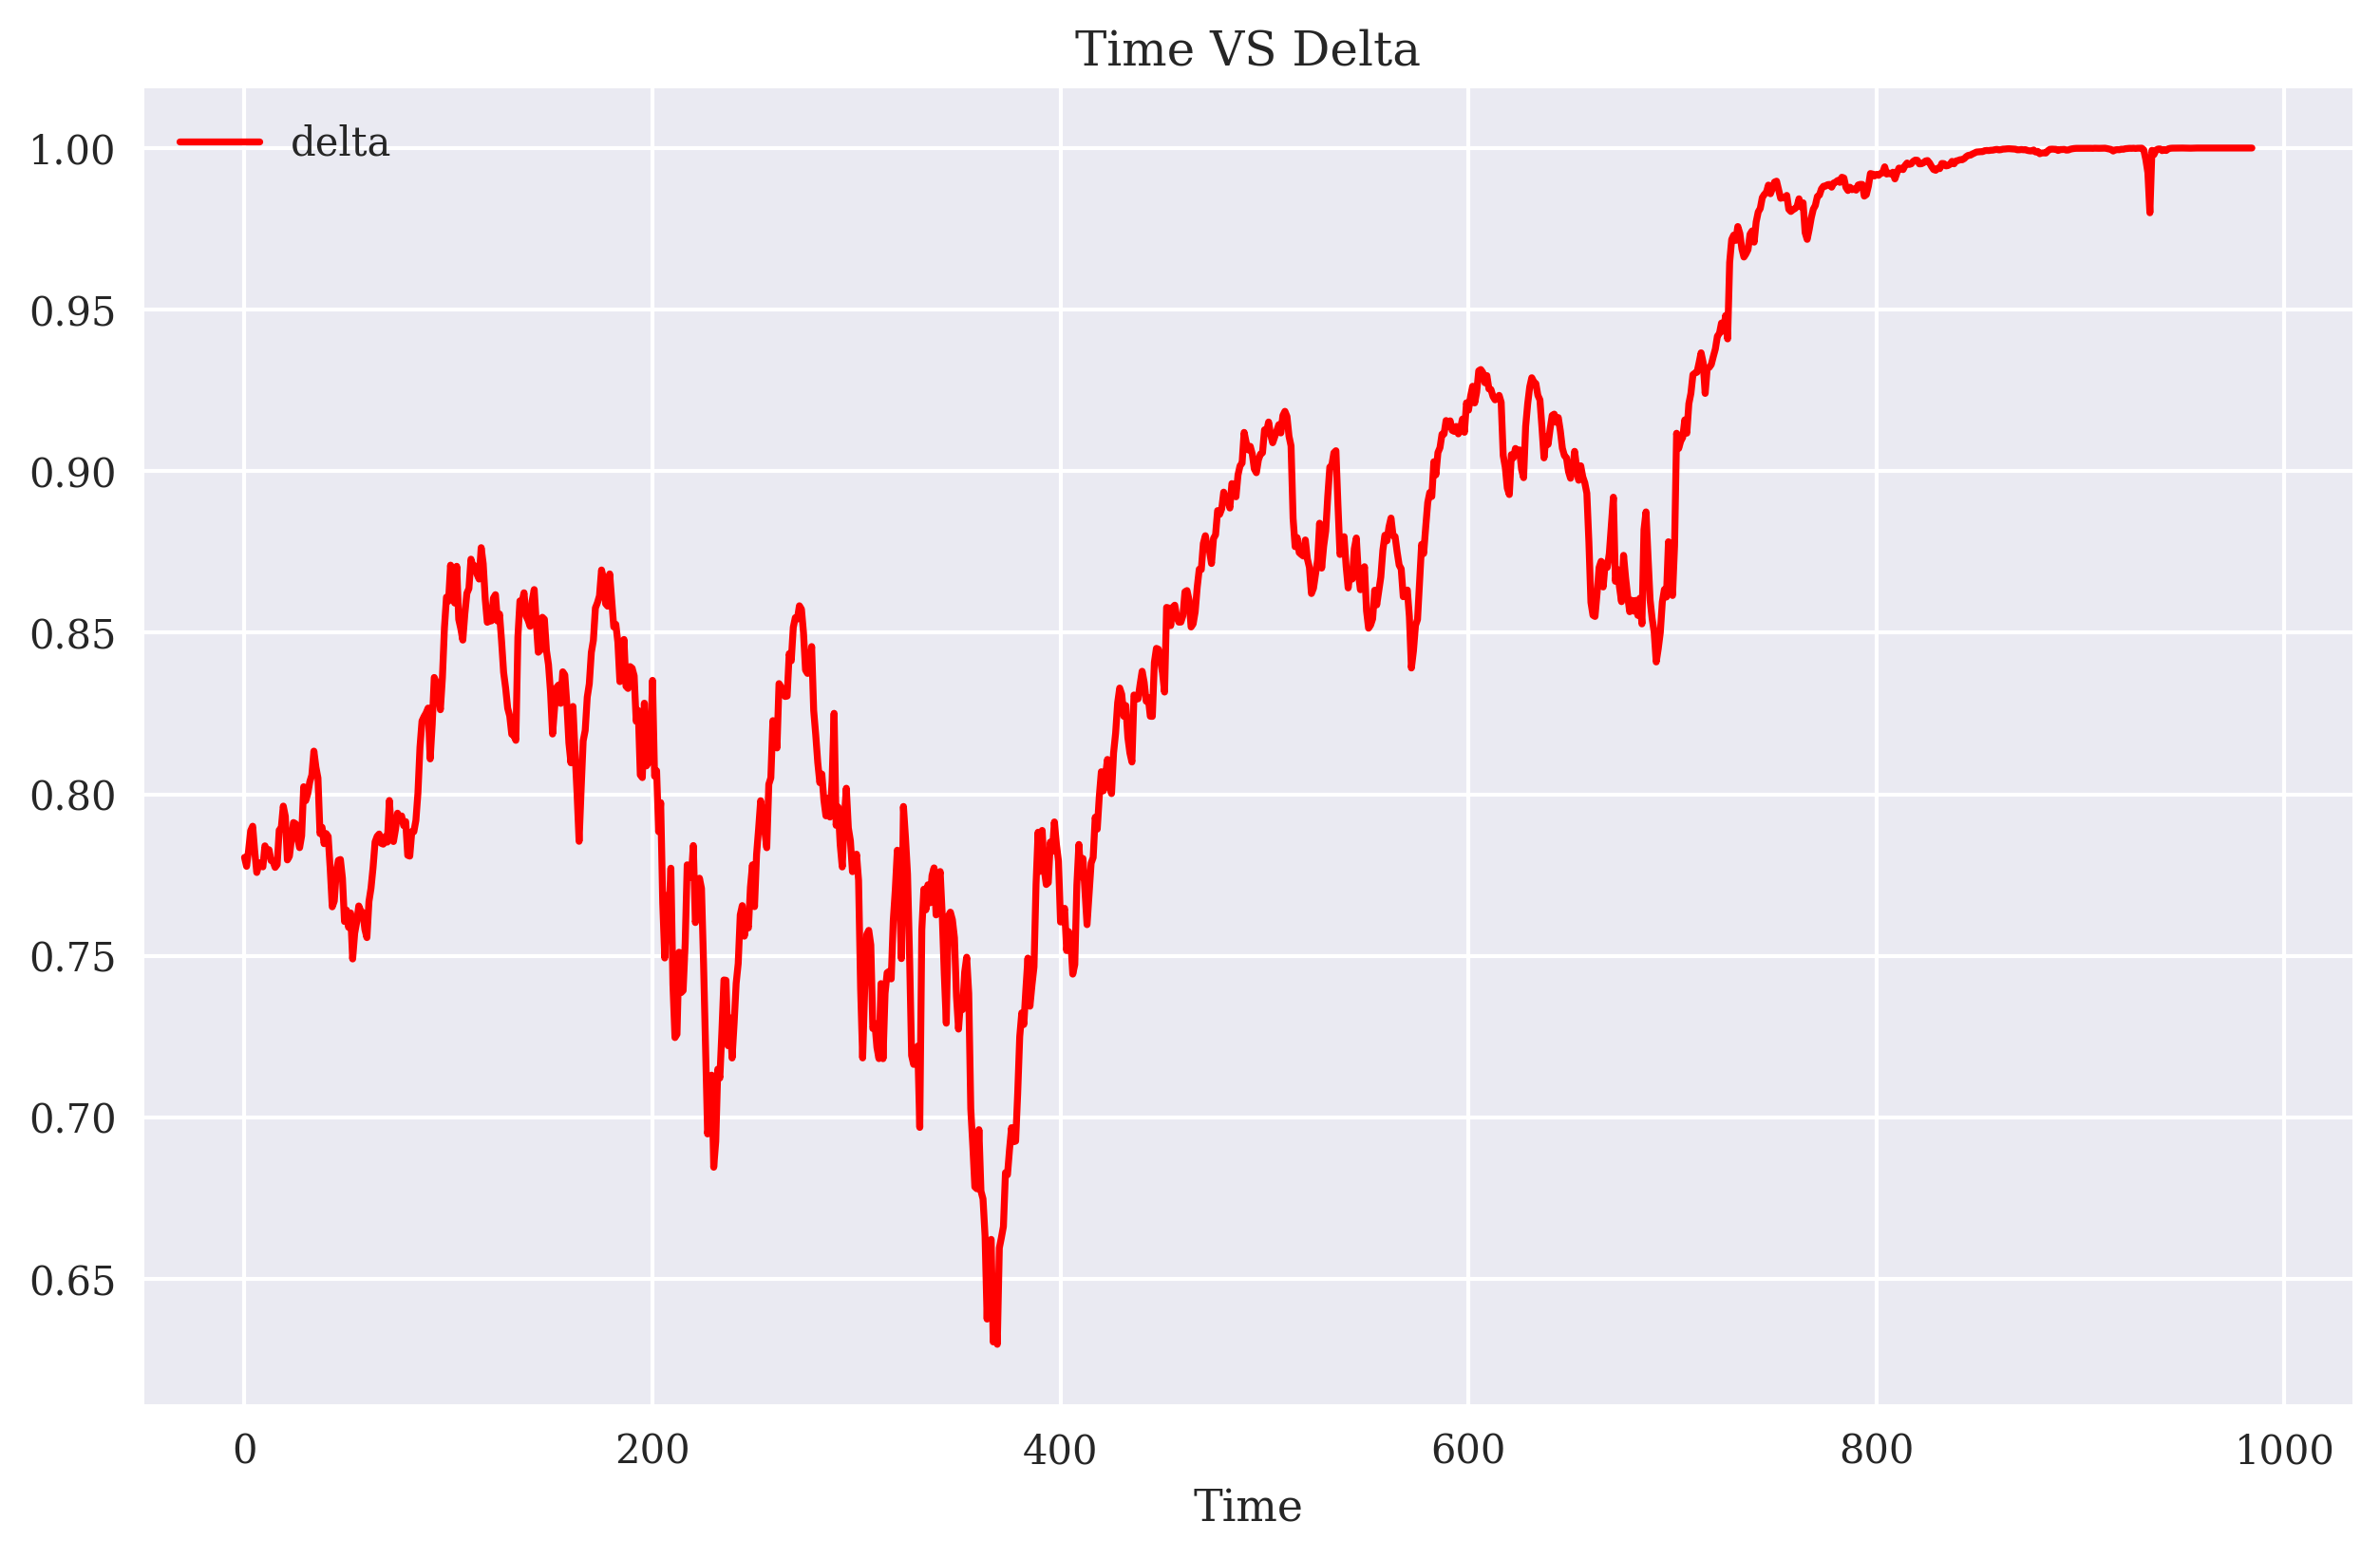

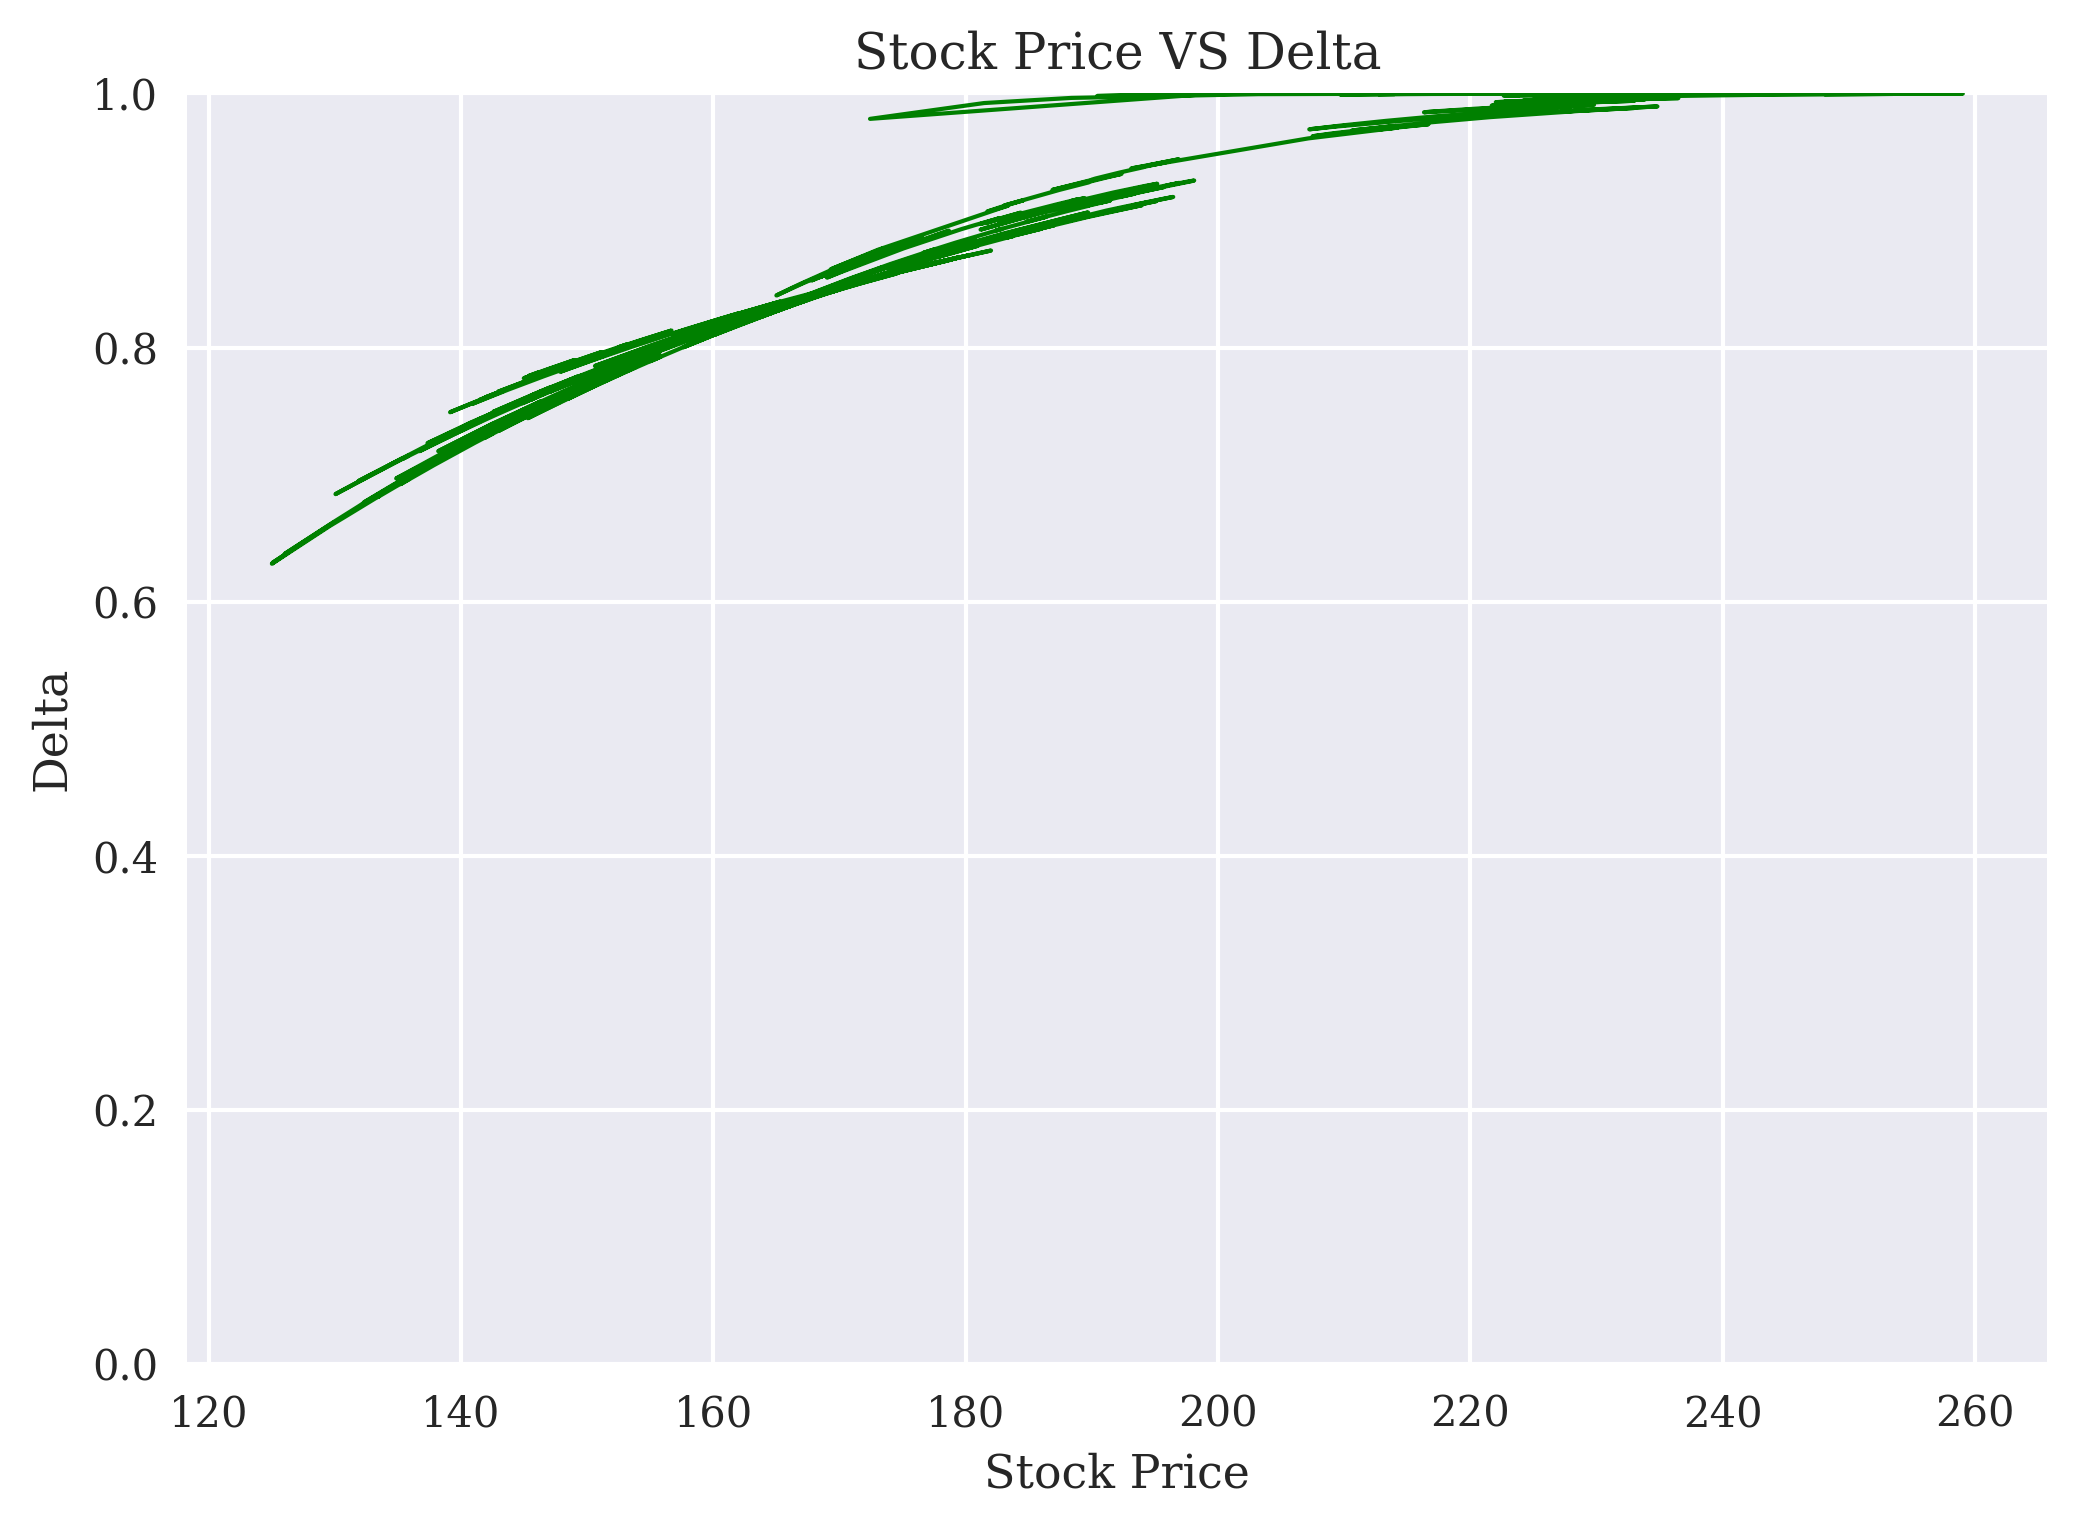

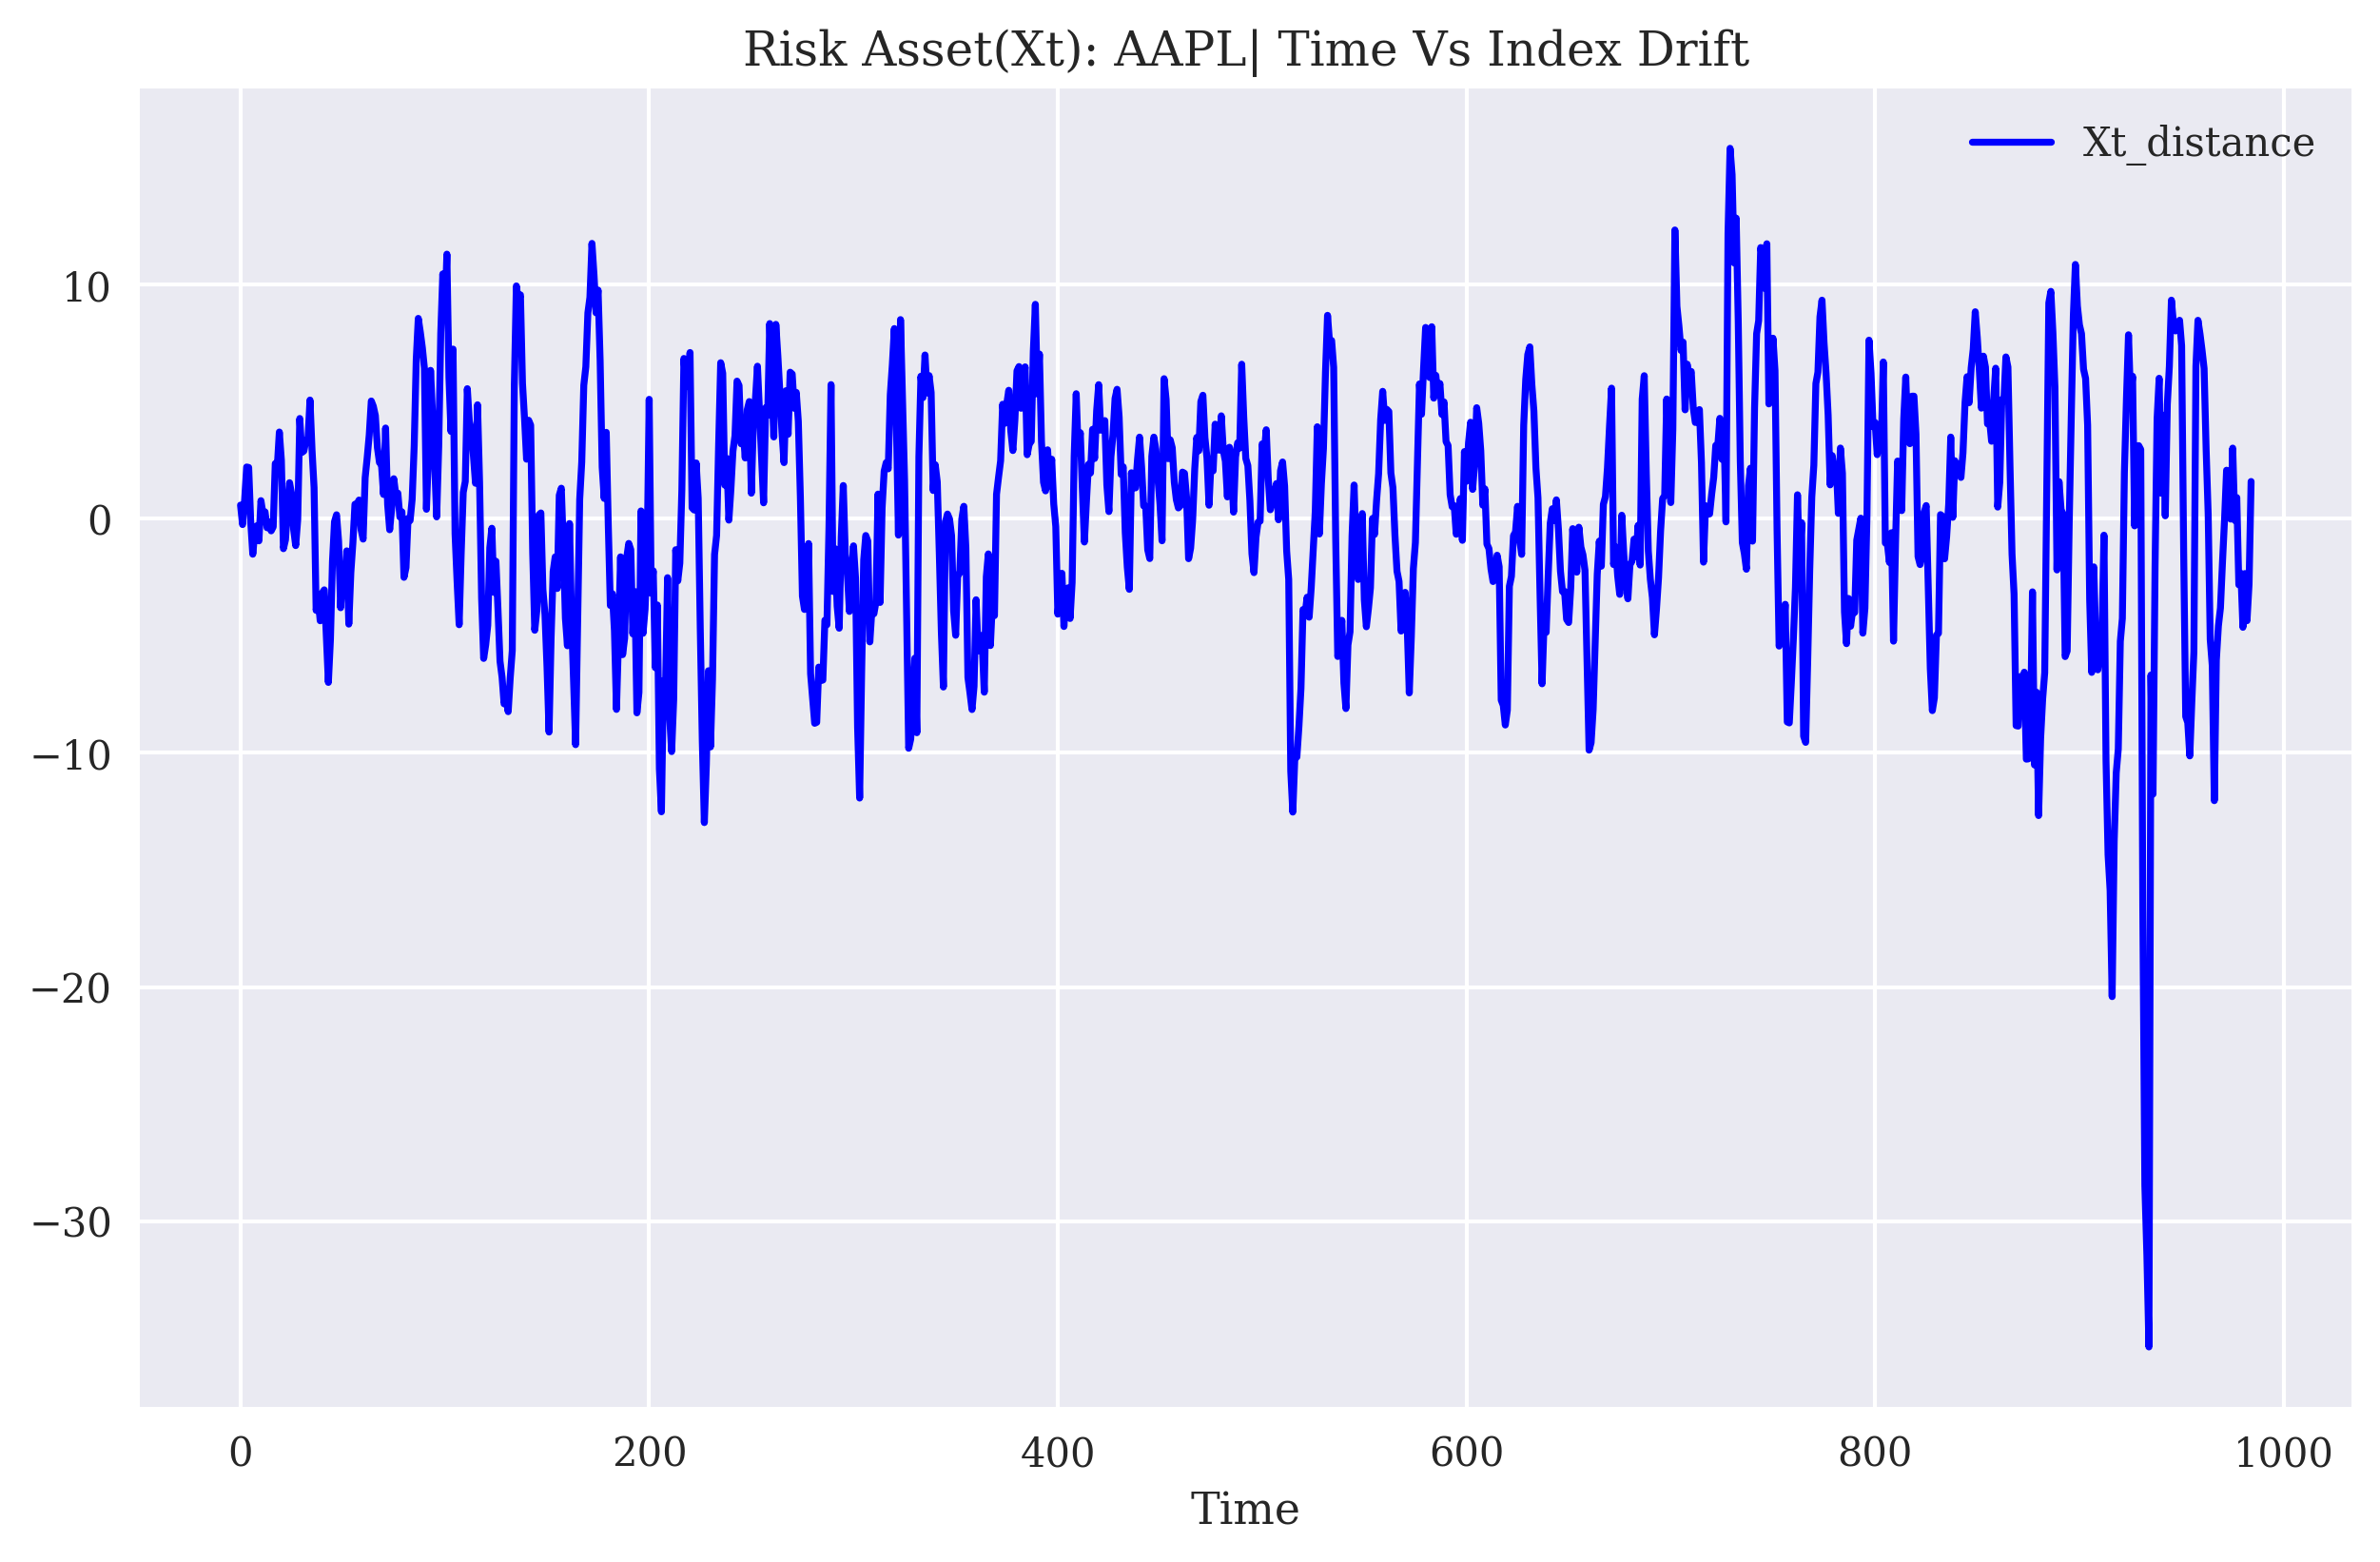

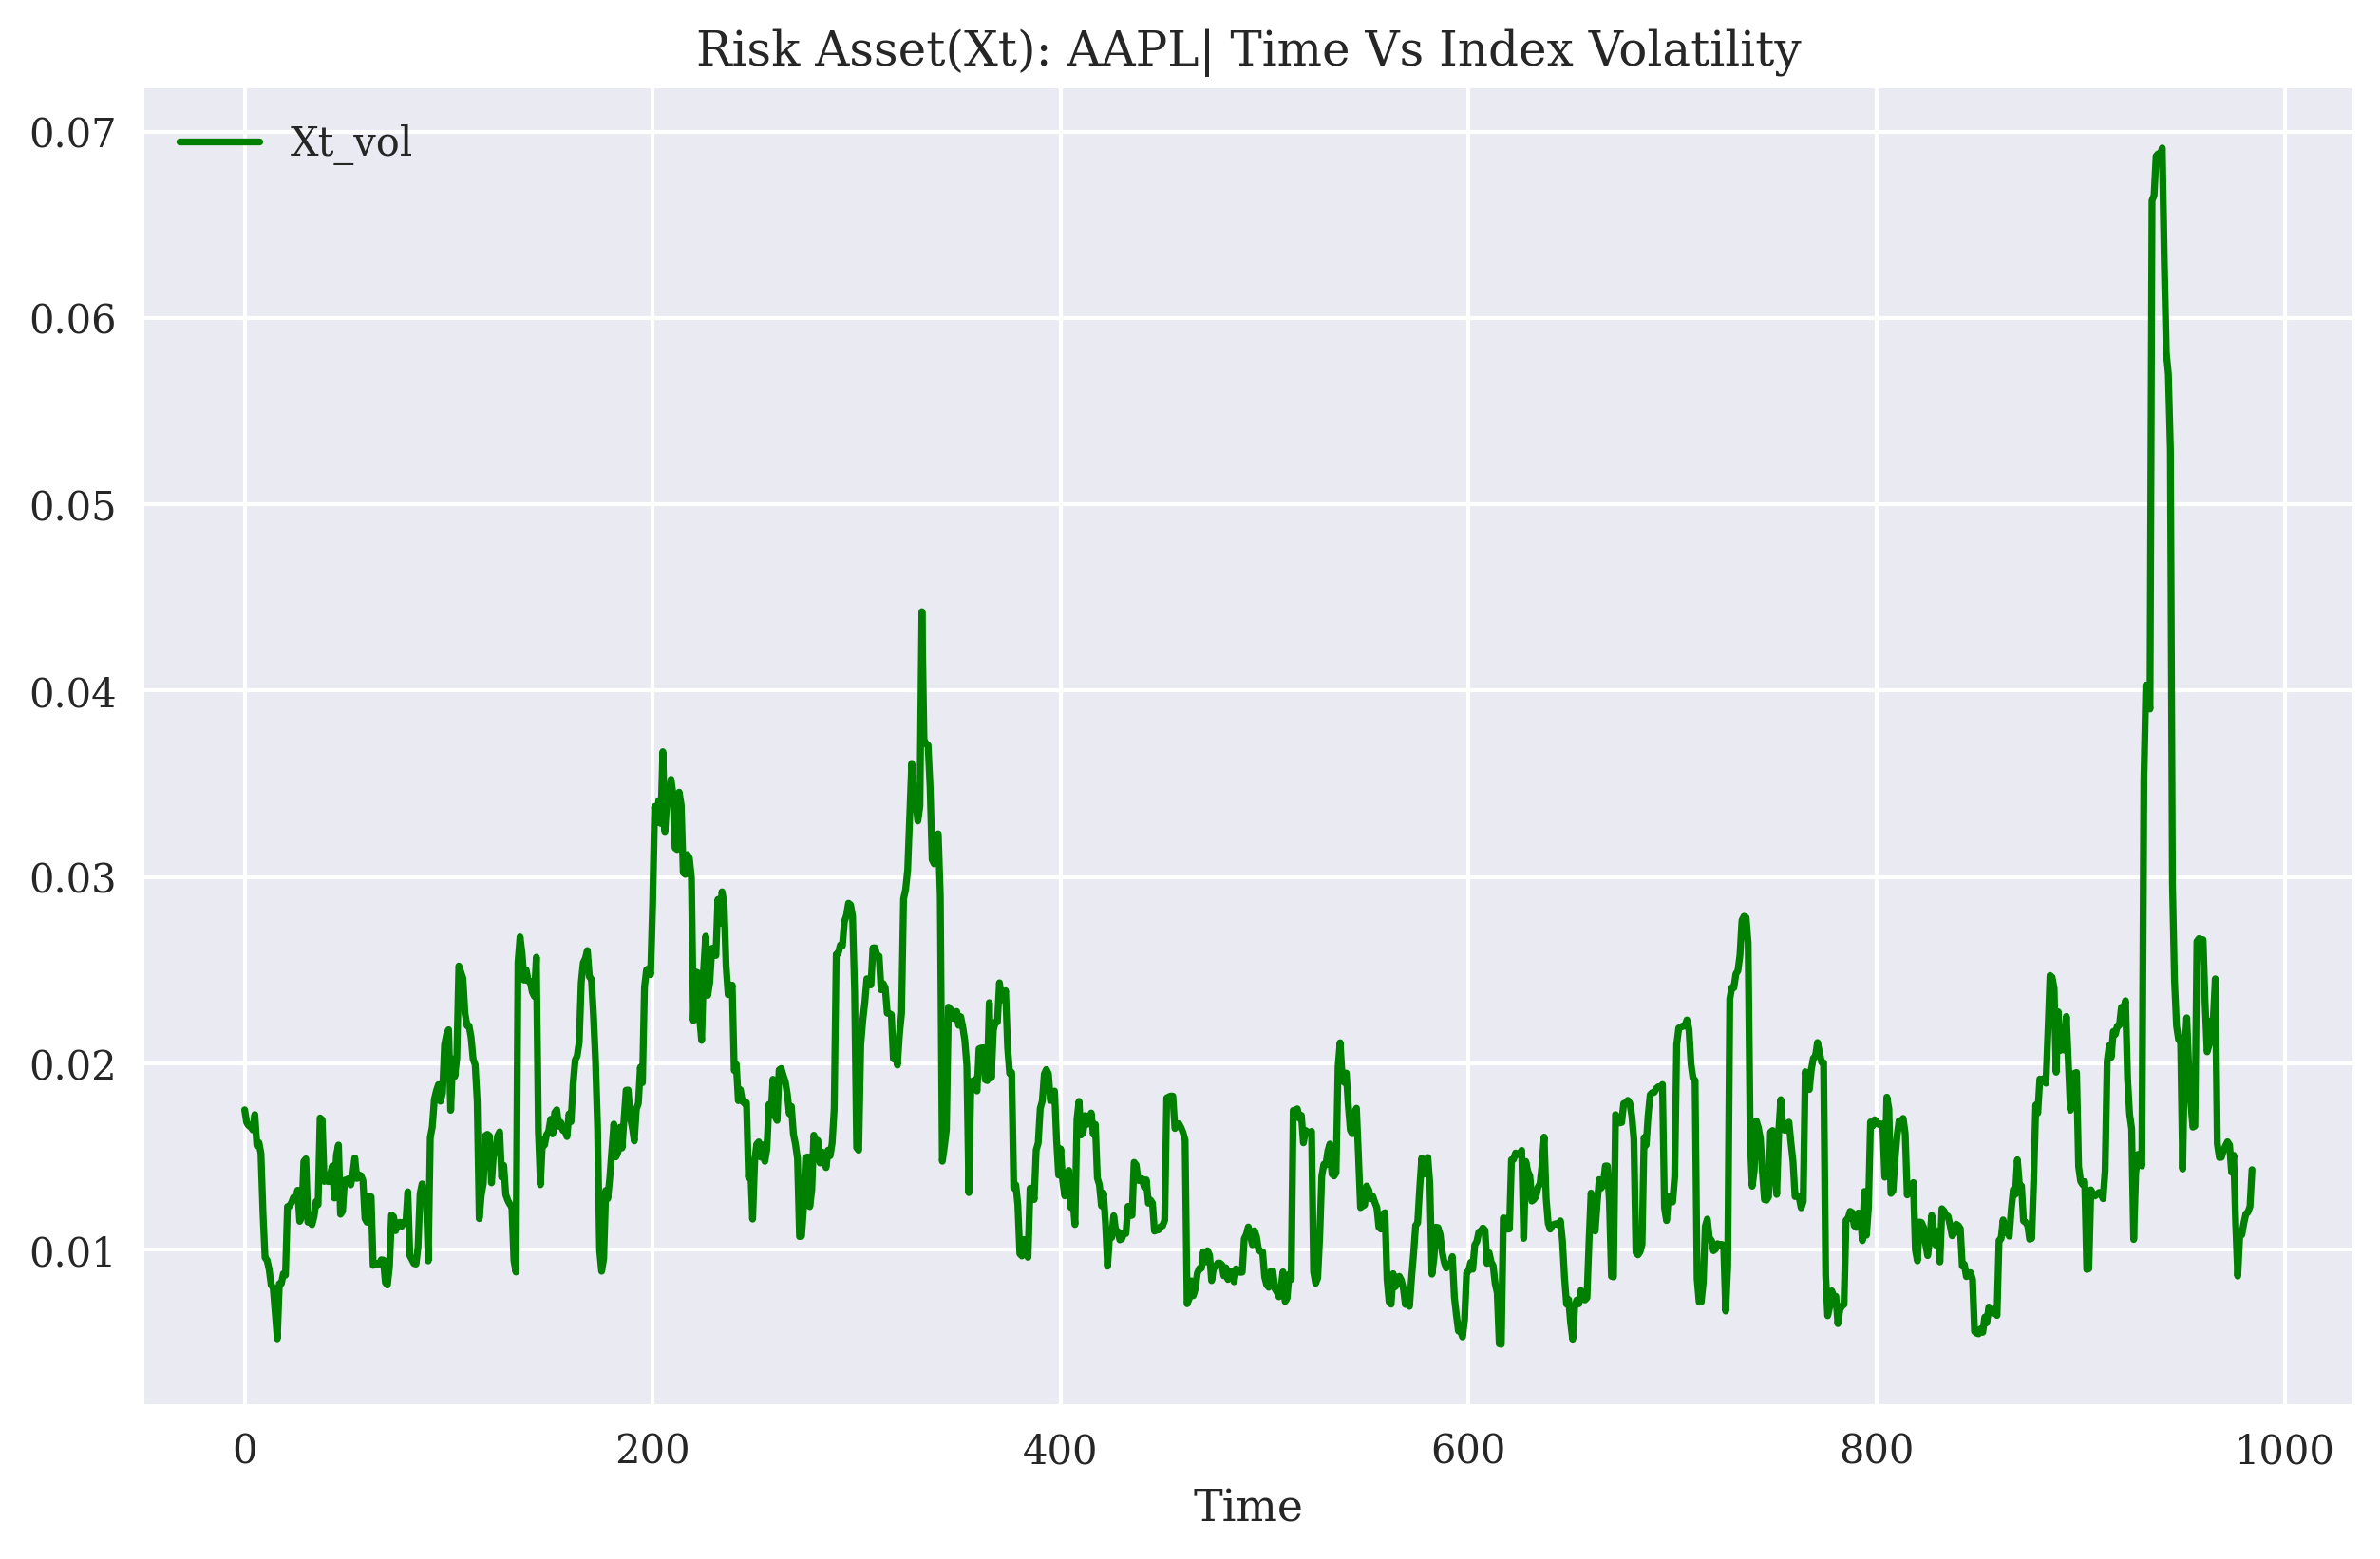

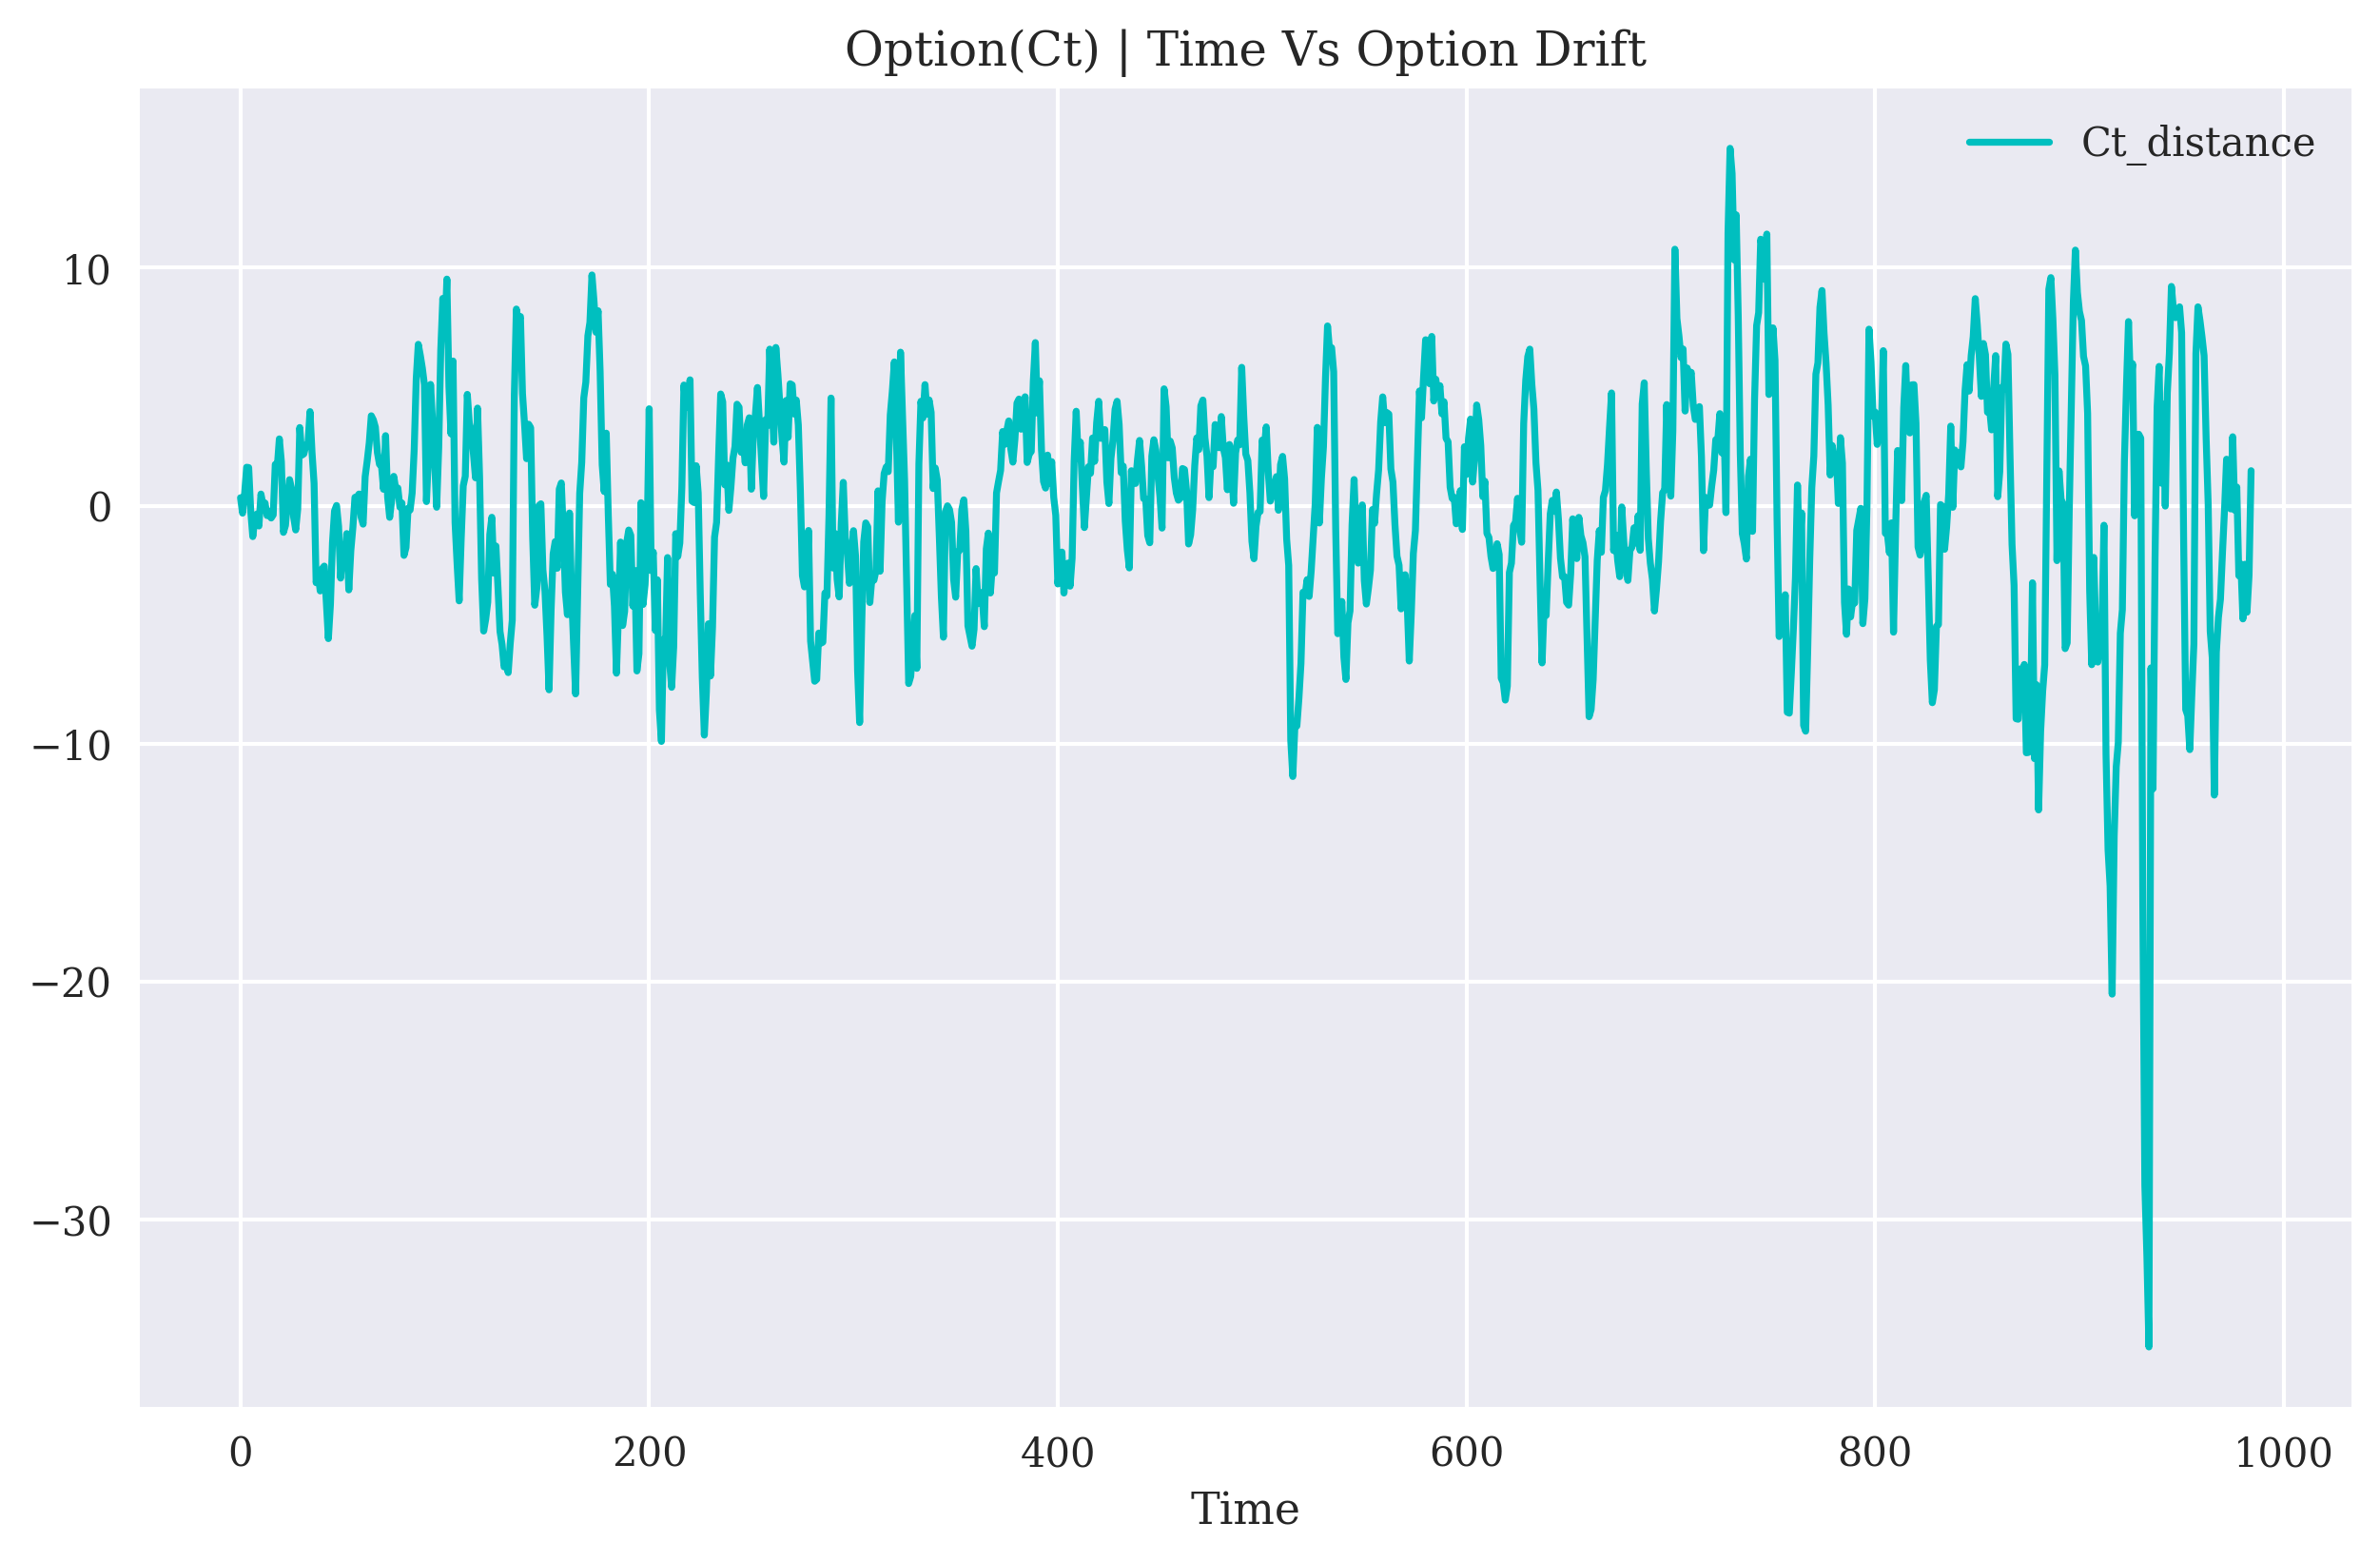

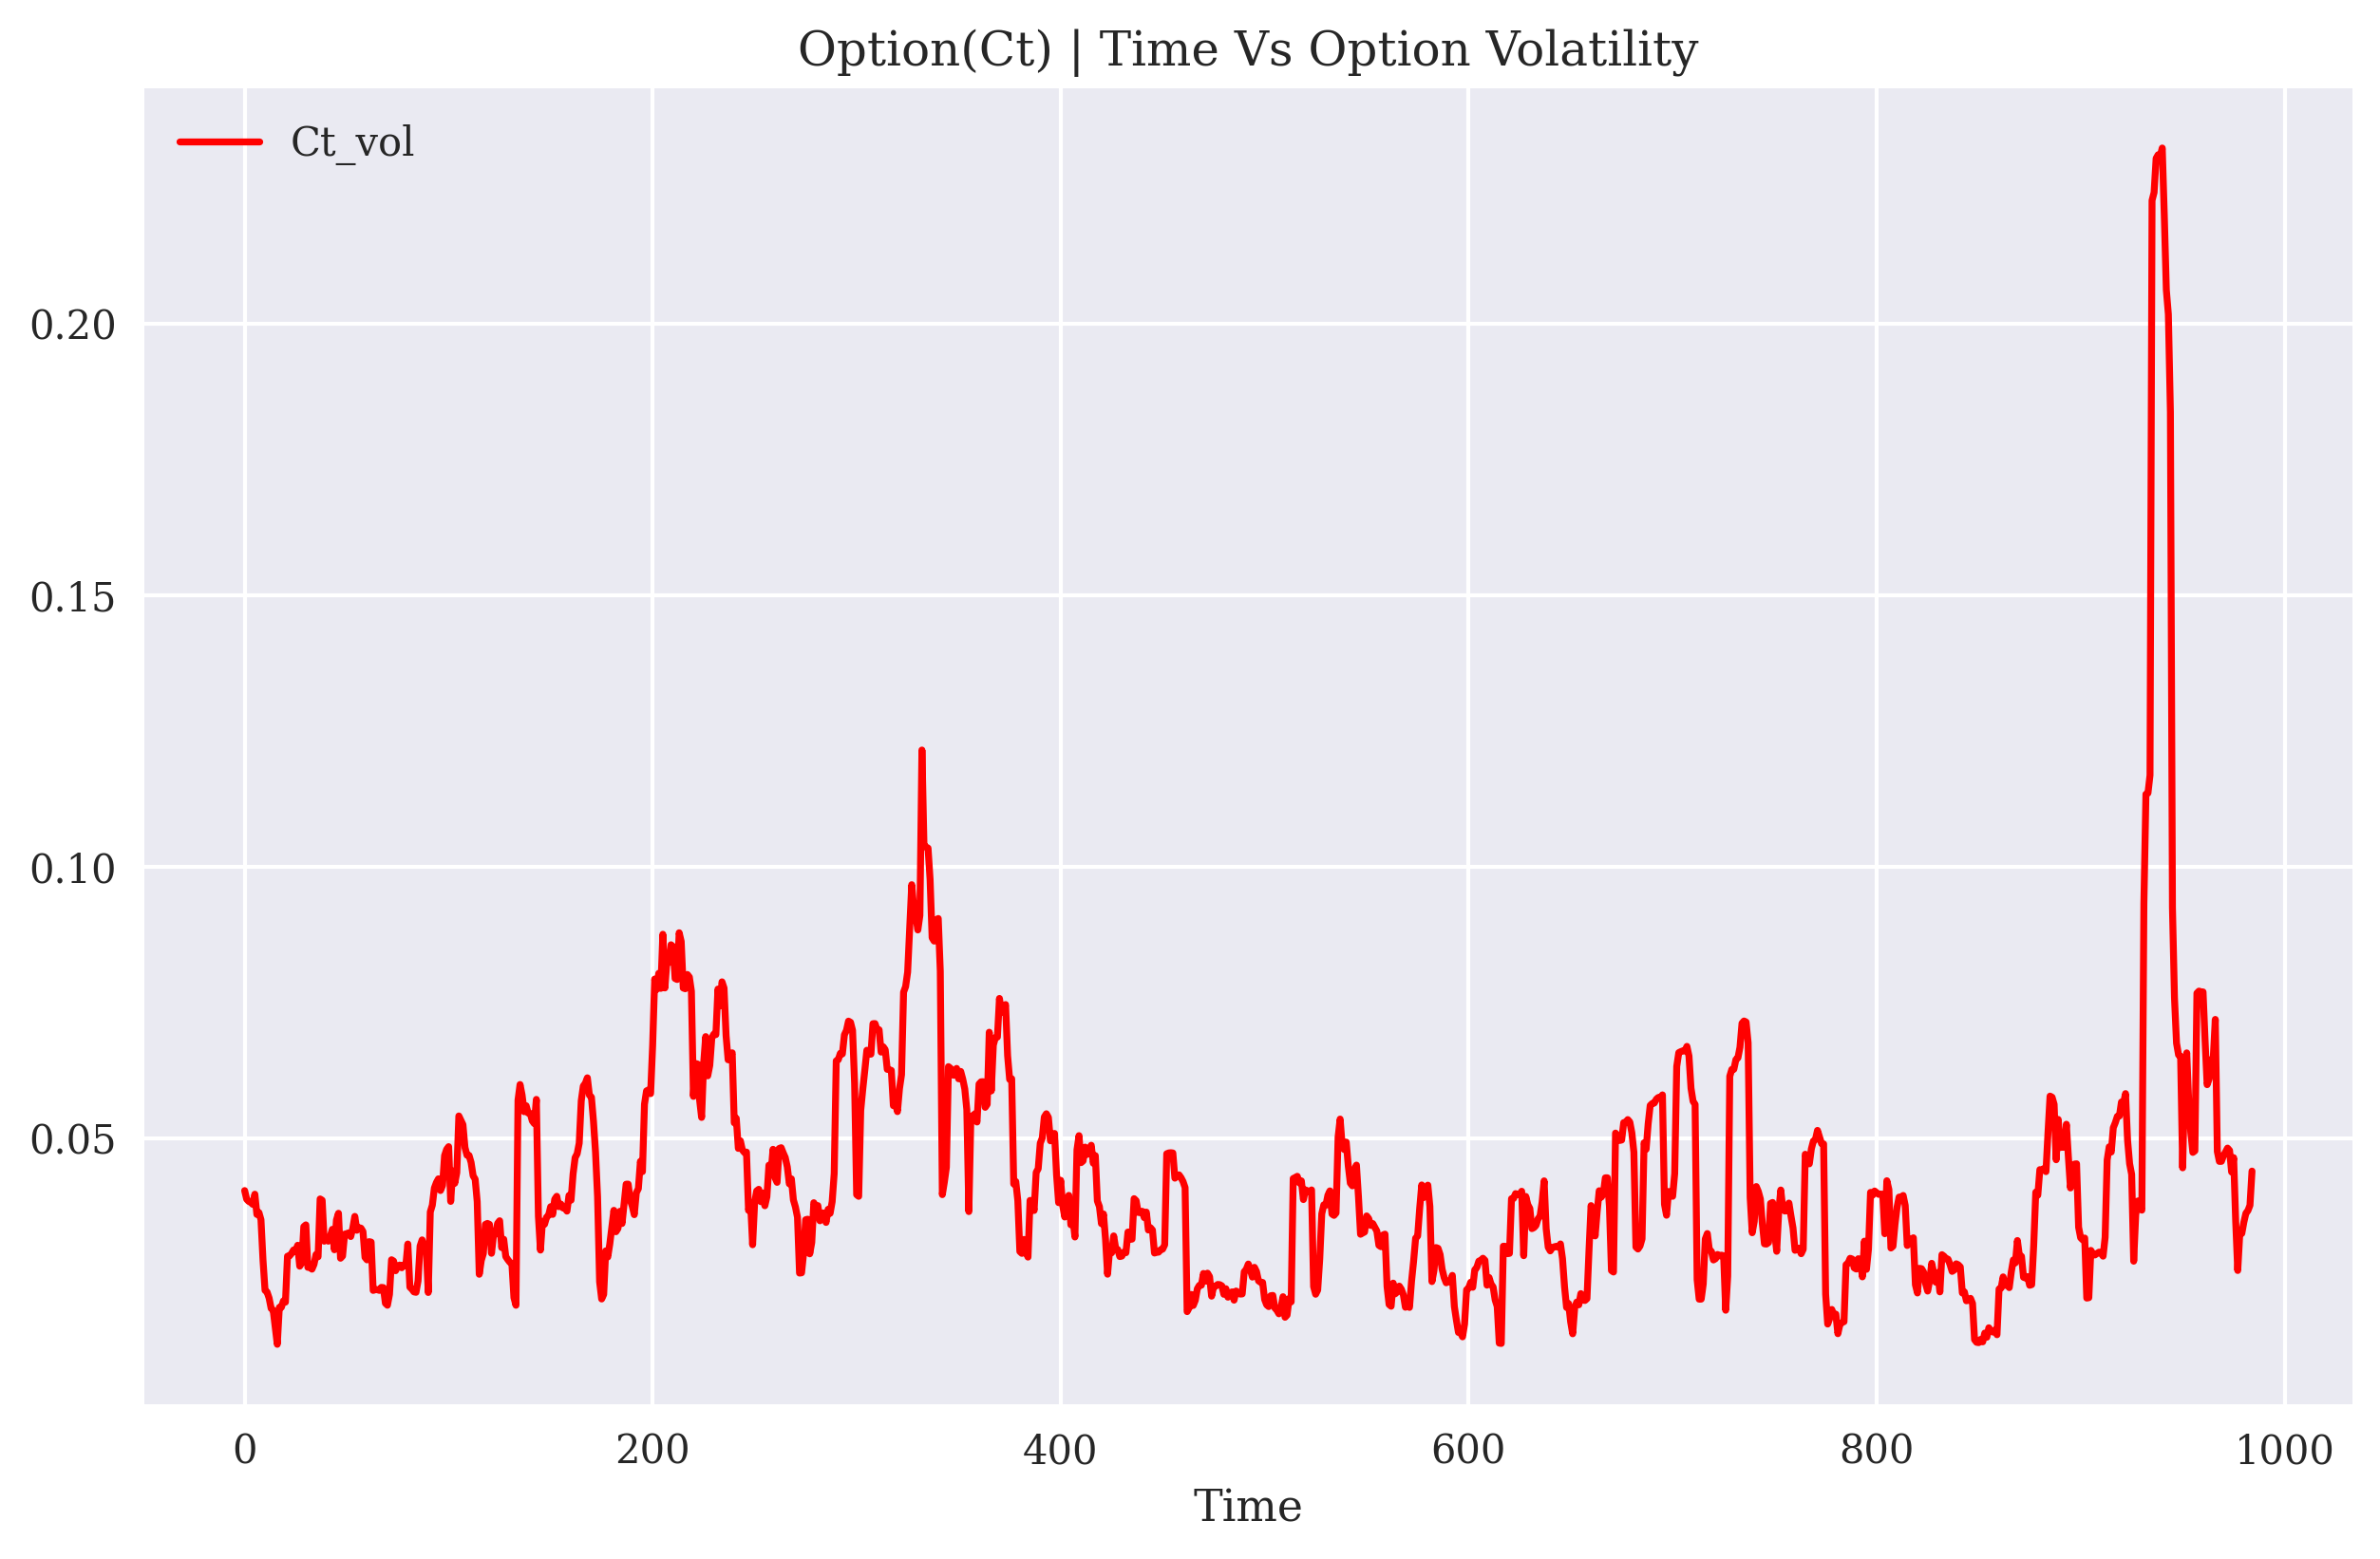

In [15]:
env.plots()

## Agent

### Model Config

In [16]:
model_config={
    "Model_1":[
        {
            "units":8,
            "activation":"relu",
            "kernel_initializer":"he_uniform",
            "kernel_regularizer":None,
            "return_sequences":True
        },
        {
            "units":16,
            "activation":"relu",
            "kernel_initializer":"he_uniform",
            "kernel_regularizer":None,
            "return_sequences":True
        },
        {
            "units":32,
            "activation":"relu",
            "kernel_initializer":"he_uniform",
            "kernel_regularizer":None,
            "return_sequences":False
        }
    ],

    "Model_2":[
        {
            "units":4,
            "activation":"relu",
            "kernel_initializer":"he_uniform",
            "kernel_regularizer":None,
            "return_sequences":True
        },
        {
            "units":8,
            "activation":"relu",
            "kernel_initializer":"he_uniform",
            "kernel_regularizer":None,
            "return_sequences":True
        },
        {
            "units":16,
            "activation":"relu",
            "kernel_initializer":"he_uniform",
            "kernel_regularizer":None,
            "return_sequences":False
        }
    ],

    "Model_3":[
        {
            "units":4,
            "activation":"relu",
            "kernel_initializer":"he_uniform",
            "kernel_regularizer":None,
            "return_sequences":True
        },
        {
            "units":8,
            "activation":"relu",
            "kernel_initializer":"he_uniform",
            "kernel_regularizer":None,
            "return_sequences":True
        },
        {
            "units":16,
            "activation":"relu",
            "kernel_initializer":"he_uniform",
            "kernel_regularizer":None,
            "return_sequences":False
        }
    ],

    "Model_4":[
        {
            "units":4,
            "activation":"relu",
            "kernel_initializer":"he_uniform",
            "kernel_regularizer":None,
            "return_sequences":True
        },
        {
            "units":8,
            "activation":"relu",
            "kernel_initializer":"he_uniform",
            "kernel_regularizer":None,
            "return_sequences":True
        },
        {
            "units":16,
            "activation":"relu",
            "kernel_initializer":"he_uniform",
            "kernel_regularizer":None,
            "return_sequences":False
        }
    ],

    

    "Model_5":[
        {
            "units":16,
            "activation":"relu",
            "kernel_initializer":"he_uniform",
            "kernel_regularizer":None
        },

        {
            "units":32,
            "activation":"relu",
            "kernel_initializer":"he_uniform",
            "kernel_regularizer":None
        }
    ],

    "Final_Model":[
        {
            "units":128,
            "activation":"relu",
            "kernel_initializer":"he_uniform",
            "kernel_regularizer":None
        },
        {
            "units":256,
            "activation":"relu",
            "kernel_initializer":"he_uniform",
            "kernel_regularizer":None
        },
        {
            "units":64,
            "activation":"relu",
            "kernel_initializer":"he_uniform",
            "kernel_regularizer":l2(0.007)
        },

        {
            "units":16,
            "activation":"relu",
            "kernel_initializer":"he_uniform",
            "kernel_regularizer":l2(0.007)
        },

        {
            "units":8,
            "activation":"relu",
            "kernel_initializer":"he_uniform",
            "kernel_regularizer":None
        },

        {
            "units":1,
            "activation":"linear",
            "kernel_initializer":"he_uniform",
            "kernel_regularizer":None
        }
        
    ]
    
}

### Optimizer Config

In [17]:
optimizer_config={
    "learning_rate":0.001,
    "beta_1":0.96,
    "beta_2":0.98
}

### Agent Initialization

In [18]:
agent=Agent(
    env=env,
    model_config=model_config,
    optimizer_config=optimizer_config,
    batch_size=128,
    buffer_size=2000,
    gamma=0.7,
    epsilon=1.0,
    epsilon_min=0.1,
    epsilon_decay=0.9975
)

2025-06-21 02:55:19.611545: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


### Model Architecture

In [19]:
agent.get_model_architecture()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 6, 3)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 6, 2)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_2       │ (None, 6, 2)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_3       │ (None, 6, 2)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 6, 8)      │        384 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_3 (LSTM)       │ (None, 6, 4)      │        112 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_6 (LSTM)       │ (None, 6, 4)      │        112 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_9 (LSTM)       │ (None, 6, 4)      │        112 │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_4       │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ (None, 6, 16)     │      1,600 │ lstm[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_4 (LSTM)       │ (None, 6, 8)      │        416 │ lstm_3[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_7 (LSTM)       │ (None, 6, 8)      │        416 │ lstm_6[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_10 (LSTM)      │ (None, 6, 8)      │        416 │ lstm_9[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 16)        │        144 │ input_layer_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_2 (LSTM)       │ (None, 32)        │      6,272 │ lstm_1[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_5 (LSTM)       │ (None, 16)        │      1,600 │ lstm_4[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_8 (LSTM)       │ (None, 16)        │      1,600 │ lstm_7[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_11 (LSTM)      │ (None, 16)        │      1,600 │ lstm_10[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 32)        │        544 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 112)       │          0 │ lstm_2[0][0],     │
│ (Concatenate)       │                   │            │ lstm_5[0][0],     │
│                     │                   │            │ lstm_8[0][0],     │
│                     │                   │            │ lstm_11[0][0],    │
│                     │                   │            │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 80,449 (314.25 KB)

 Trainable params: 80,449 (314.25 KB)

 Non-trainable params: 0 (0.00 B)

### Agent Training

In [20]:
agent.train_agent(
    episodes=50,
    steps_per_episode=2,
    training_version="1_o",
    verbose=True
)

KeyboardInterrupt: 